# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

In [6]:
url="http://api.openweathermap.org/data/2.5/weather?"

query_url=f"{url}appid={api_key}&q="
#response=requests.get(query_url+city+"&units=imperial").json()
#response

In [7]:
temp=[]
lat=[]
lon=[]
hum=[]
cloud=[]
wind=[]
max_temp=[]
print(f"Begining Data retrieval")
for city in cities:
    response_r=requests.get(query_url+city+"&units=imperial")
    response=response_r.json()
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        print(f"Procesing record {len(temp)}:{city}")
    except:
        print('Nothing')
        pass
    


Begining Data retrieval
Nothing
Procesing record 1:narsaq
Procesing record 2:atuona
Procesing record 3:victoria
Procesing record 4:cape town
Procesing record 5:rikitea
Procesing record 6:chapais
Procesing record 7:mataura
Procesing record 8:la palma
Procesing record 9:koson
Procesing record 10:new norfolk
Nothing
Procesing record 11:esperance
Nothing
Procesing record 12:puerto ayora
Procesing record 13:busselton
Procesing record 14:hobart
Procesing record 15:gazimurskiy zavod
Procesing record 16:hambantota
Procesing record 17:ribeira grande
Procesing record 18:bahia blanca
Procesing record 19:katangli
Procesing record 20:sakakah
Procesing record 21:shawinigan
Procesing record 22:kapaa
Nothing
Nothing
Procesing record 23:bluff
Procesing record 24:tuktoyaktuk
Procesing record 25:sao filipe
Procesing record 26:srednekolymsk
Procesing record 27:havoysund
Procesing record 28:lasa
Procesing record 29:thompson
Procesing record 30:tanout
Procesing record 31:georgetown
Procesing record 32:hilo


Procesing record 265:vestmannaeyjar
Procesing record 266:kloulklubed
Procesing record 267:margate
Procesing record 268:san patricio
Procesing record 269:shimoda
Procesing record 270:aliaga
Procesing record 271:rioja
Procesing record 272:acari
Procesing record 273:bonthe
Procesing record 274:tolga
Procesing record 275:beidao
Procesing record 276:raudeberg
Procesing record 277:calama
Procesing record 278:rocha
Procesing record 279:sylacauga
Procesing record 280:kahului
Procesing record 281:belem de sao francisco
Procesing record 282:llanelli
Procesing record 283:ostrovnoy
Procesing record 284:key west
Procesing record 285:yumen
Procesing record 286:yerbogachen
Procesing record 287:flinders
Procesing record 288:kalmunai
Procesing record 289:erdenet
Procesing record 290:popondetta
Procesing record 291:cockburn town
Procesing record 292:elat
Procesing record 293:castro
Procesing record 294:hay river
Procesing record 295:lorengau
Procesing record 296:kolokani
Procesing record 297:korba
Proce

Procesing record 532:umm kaddadah
Procesing record 533:aloleng
Procesing record 534:mapiri
Procesing record 535:puerto rondon
Procesing record 536:umm lajj
Nothing
Procesing record 537:matagami
Procesing record 538:zinder
Procesing record 539:buala
Procesing record 540:alofi
Procesing record 541:kasongo-lunda
Procesing record 542:marsh harbour
Procesing record 543:saint-georges
Procesing record 544:wajid
Procesing record 545:ati
Procesing record 546:hereford
Procesing record 547:robat karim
Procesing record 548:alekseyevsk
Procesing record 549:lishui
Procesing record 550:tiarei
Procesing record 551:tonantins
Procesing record 552:azul
Procesing record 553:trairi
Procesing record 554:nelson bay
Procesing record 555:kysyl-syr
Procesing record 556:ruteng
Procesing record 557:tibacuy
Procesing record 558:hokitika
Procesing record 559:kaspiyskiy
Procesing record 560:teguldet
Nothing
Procesing record 561:vuktyl
Procesing record 562:kabin buri
Procesing record 563:nicoya
Procesing record 564:p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_dict={"City":cities,
         "Latitude":lat,
         "Longtitude":lon,
         "Temp":temp,
         "Max Temp":max_temp,
         "Cloudiness":cloud,
         "Humidity":hum,
         "Wind":wind }
            
        
city_temp=pd.concat([pd.Series(v,name=k) for k,v in city_dict.items()],axis=1)
city_temp=city_temp.dropna()
city_temp

,City,Latitude,Longtitude,Temp,Max Temp,Cloudiness,Humidity,Wind
0,samusu,60.92,-46.05,15.80,15.80,75.0,66.0,4.70
1,narsaq,-9.80,-139.03,80.69,80.69,2.0,80.0,16.53
2,atuona,22.29,114.16,62.13,63.00,100.0,96.0,8.01
3,victoria,-33.93,18.42,65.68,66.99,75.0,93.0,10.29
4,cape town,-23.12,-134.97,78.44,78.44,0.0,79.0,15.35
...,...,...,...,...,...,...,...,...
560,kudahuvadhoo,63.86,57.31,-8.77,-8.77,91.0,98.0,1.74
561,asau,13.95,101.72,73.53,73.53,84.0,84.0,3.15
562,bonfim,10.15,-85.45,73.00,73.00,0.0,77.0,20.00
563,nioki,10.99,-74.95,79.11,79.11,25.0,79.0,17.60


In [9]:
city_temp.to_csv('cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature Plot')

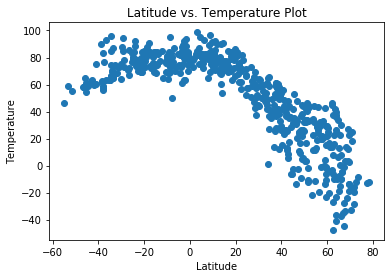

In [10]:
plt.scatter(lat,temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature Plot')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity Plot')

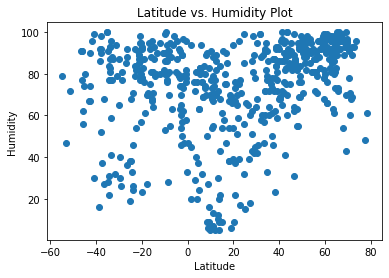

In [11]:
plt.scatter(lat,hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness Plot')

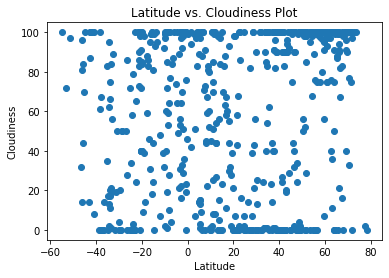

In [12]:
plt.scatter(lat,cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

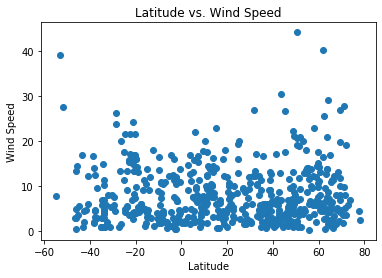

In [13]:
plt.scatter(lat,wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames
city_north=city_temp[city_temp['Latitude']>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8758451571830099


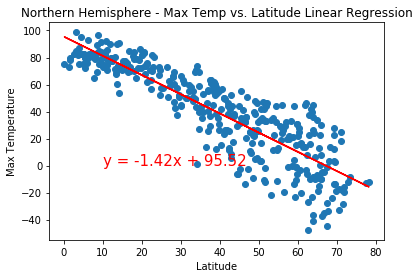

In [16]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.5033548034780656


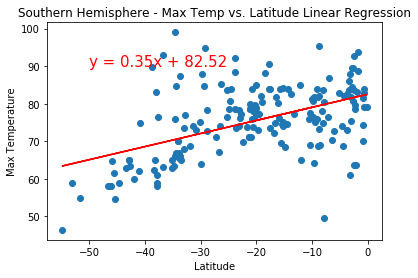

In [17]:
city_south=city_temp[city_temp['Latitude']<0]
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.5121280691825474


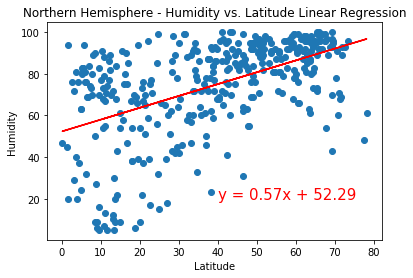

In [18]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.10658613867724606


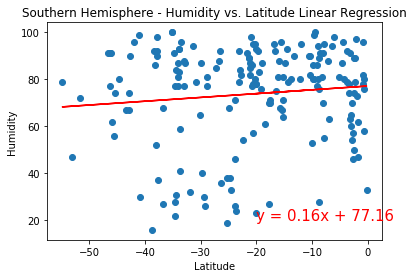

In [19]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.2506392834340744


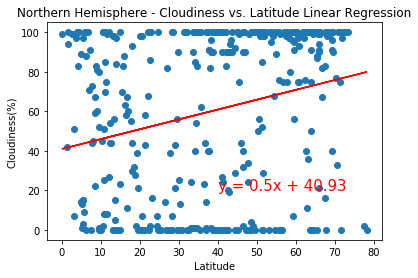

In [20]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.1520329731547215


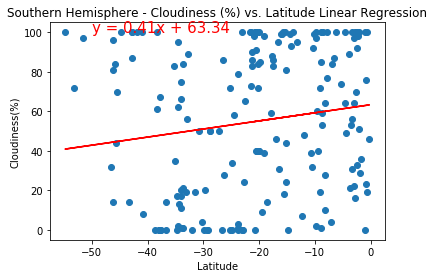

In [21]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.04129573846234382


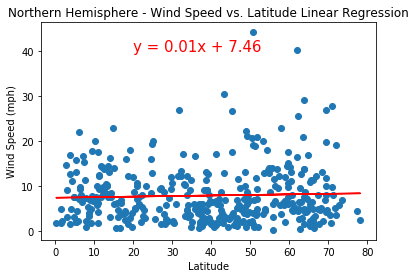

In [22]:
x_values = city_north['Latitude'].astype('float')
y_values = city_north['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.12649697982331018


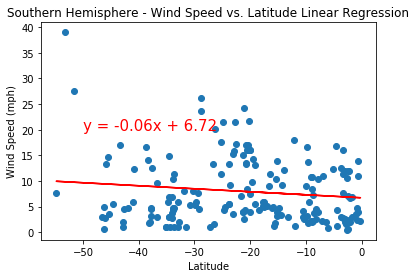

In [23]:
x_values = city_south['Latitude'].astype('float')
y_values = city_south['Wind'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()